# Lecture 3: non-homogeneous second-order ordinary differential equations

In this lecture we move onto non-homogeneous second-order ordinary differential equations. We want to solve equations of the form

$$
a \frac{d^{2}y}{dx^{2}} + b \frac{dy}{dx} + c y = f(x)
$$

where $a$, $b$ and $c$ are real constants. We've seem previously that for the case $b^{2} \ne 4ac$ and
$f(x) = 0$, the general solution to the above equation is 

$$
y = A_{1} e^{\lambda_{1}x} + A_{2}e^{\lambda_{2}x}
$$

where $\lambda$ are the roots to the characteristic equation $a\lambda^{2} + b \lambda + c = 0$. For the case that $b^{2} = 4ac$ (repeated roots), the general solution is of the form

$$
y =(A_{1} + A_{2} x) e^{\lambda x}
$$

Recall that the constants $A_{1}$ and $A_{2}$ are determined from the boundary conditions.

# Initialising SymPy

To solve equations using SymPy, we again need to import SymPy, and we'll call `init_printing()` to get nicely typeset equations:

In [1]:
from sympy import *

# This initialises pretty printing
init_printing()
from IPython.display import display

# Support for interactive plots
from ipywidgets import interact

# This command makes plots appear inside the browser window
%matplotlib inline

# Mass-spring-damper system

The differential equation that governs a single degree-of-freedom mass-spring-damper system, with a forcing term $f(t)$, is

$$
m \frac{d^{2}y}{dt^{2}} + \nu \frac{dy}{dt} + ky = f(t)
$$

To solve this problem using SymPy, we first define the symbols $t$ (time), $m$ (mass), $\nu$ (damping coefficient) and $k$ (spring stiffness), and the function $y$ (displacement): 

In [2]:
t, m, nu, k = symbols("t m nu k")
y = Function("y")
f = Function("f")

Next, we define the differential equation, and print it to the screen:

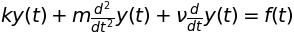

In [3]:
eqn = Eq(m*Derivative(y(t), t, t) + nu*Derivative(y(t), t) + k*y(t), f(t))
display(eqn)

## Classifying the ODE

Checking the order of the ODE:

In [4]:
print("This order of the ODE is: {}".format(ode_order(eqn, y(t))))

This order of the ODE is: 2


As expected, it is second order. Now classifying the ODE:

In [5]:
print("Properties of the ODE are: {}".format(classify_ode(eqn)))

Properties of the ODE are: ('nth_linear_constant_coeff_variation_of_parameters', 'nth_linear_constant_coeff_variation_of_parameters_Integral')


## Solving the ODE

We can now solve the ODE symbolically:

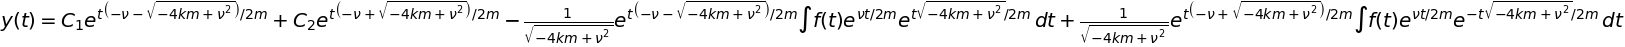

In [6]:
soln = dsolve(eqn)
display(soln)

The appears rather complex because it is a very general case - we haven't been specific with the parameters of the forcing function.

Seting $C_{1} = C_{2} = 1$, we can create an interactive plot of the solution where we can vary $m$, $\nu$ and $k$: 

In [7]:
def plot_solution(m=10, ν=1, k=20):
    # Substitute in parameters
    eqn1 = eqn.subs(f(t), 0).subs('m', m).subs('nu', ν).subs('k', k)
    
    roots = (-ν - sqrt(ν**2 - 4*m*k))/(2*m), (-ν + sqrt(ν**2 - 4*m*k))/(2*m)
    print("Roots of characteristic eqn:", roots)
    
    # Solve and insert constants
    soln = dsolve(eqn1)
    soln = soln.subs('C1', 0).subs('C2', 1)

    # Plot position vs time
    plot(soln.args[1], (t, 0.0, 20.0), ylim=(-1, 1), xlabel="time", ylabel="displacement");

interact(plot_solution, m=(1, 100, 1), ν=(0, 30, 0.5), k=(0.1, 100, 1));

interactive(children=(IntSlider(value=10, description='m', min=1), FloatSlider(value=1.0, description='ν', max=30.0, step=0.5), FloatSlider(value=20.0, description='k', min=0.1, step=1.0), Output()), _dom_classes=('widget-interact',))

We can see the that the solution is a decaying sinusoidal function.

## Exercise:

Try changing $f(t)$ to explore the response for different forcing functions.

# Example: resonance

An undamped system ($\lambda = 0$) changes character when the forcing term is sinusoidal at the natural frequency of the system. The corresponds to the case of the forcing term having the same form as the solution to the homogeneous problem.

The natural frequency $\omega_{n} = \sqrt{k/m}$. Setting $f(t) = \sin( \alpha \omega_{n} x)$:

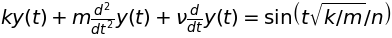

In [8]:
# Define natural frequency
omega = Symbol("omega")
omega = sqrt(k/m)

# Set f(t) = sin(\omega t)
n = symbols("n")

eqn1 = eqn.subs(f(t), sin(omega*t/n))
display(eqn1)

We now set values for $m$, $\nu$ and $k$ (we'll set $\nu = 0$ which corresponds to an undamped system):

In [9]:
# Set numerical values for m, lambda and k
m, nu, k = 4, 0, 1
eqn1 = eqn1.subs('m', m).subs('k', k).subs('nu', nu)

def plot_solution(n=0):
    # Substitute in parameters
    eqn2 = eqn1.subs('n', n)
    
    # Solve and insert constants
    soln = dsolve(eqn2)
    soln = soln.subs('C1', 0).subs('C2', 1)
    display(soln)
           
    # Plot position vs time
    plot(soln.args[1], (t, 0.0, 200.0), xlabel="time", ylabel="displacement");

interact(plot_solution, n=(1, 10, 1));

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), Output()), _dom_classes=('widget-interact',))

Note that when $n=$ (frequency of forcing is equal to the natural frequency), $t$ appears in front of the cosine term. This implies that the solution will grow linearly in time, and is a feature of resonance.